In [1]:
#Importing required libraries

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.svm import SVR

In [2]:
df=pd.read_excel("database_new.xlsx")

In [3]:
df.shape

(18526, 36)

In [8]:
df.head()

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,mie_epsilon,length_scale_factor,...,q_sca,g,c_geo,c_ext,c_abs,c_sca,ssa,mac_total,mac_bc,mac_organics
0,660,1.5,0,15.0,1.0,15.000000,15.000000,23.829600,2,0.0952,...,0.000389,0.003798,0.000707,0.000083,0.000083,2.750739e-07,0.003318,3.897000,3.897000,na
1,660,1.5,0,15.0,2.0,18.898816,18.898816,33.934547,2,0.0952,...,0.001005,0.008979,0.001122,0.000173,0.000172,1.128127e-06,0.006529,4.047873,4.047873,na
2,660,1.5,0,15.0,3.0,21.633744,21.633744,41.730020,2,0.0952,...,0.001755,0.016226,0.001470,0.000270,0.000267,2.579832e-06,0.009558,4.202000,4.202000,na
3,660,1.5,0,15.0,4.0,23.811016,23.811016,48.324498,2,0.0952,...,0.002516,0.022854,0.001781,0.000362,0.000357,4.481784e-06,0.012386,4.212966,4.212966,na
4,660,1.5,0,15.0,5.0,25.649639,25.649639,54.149126,2,0.0952,...,0.003323,0.029703,0.002067,0.000454,0.000447,6.867783e-06,0.015117,4.220137,4.220137,na


<AxesSubplot:>

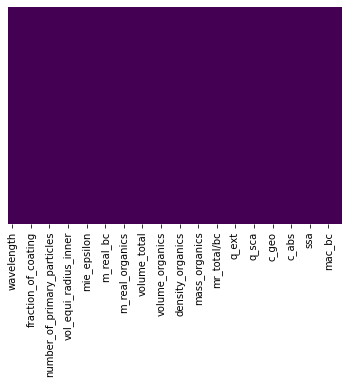

In [9]:
#Check if any null or NaN values in dataset

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<AxesSubplot:>

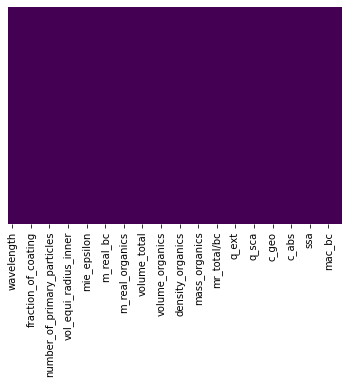

In [10]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')


Data distribution

In [11]:
#Wavelength

<AxesSubplot:xlabel='wavelength', ylabel='Count'>

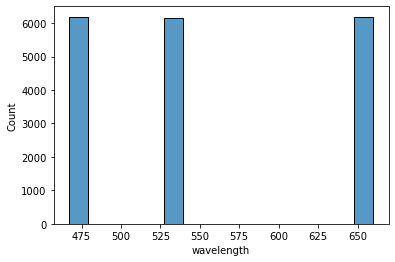

In [12]:
sns.histplot(df['wavelength'])

In [13]:
df['wavelength'].unique()

array([660, 530, 467], dtype=int64)

In [14]:
#Fractal dimension

<AxesSubplot:xlabel='fractal_dimension', ylabel='Count'>

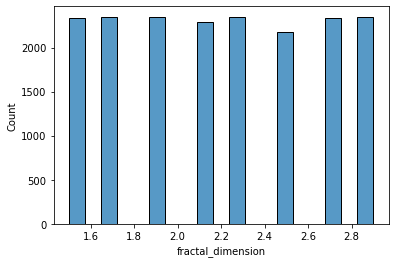

In [15]:
sns.histplot(df['fractal_dimension'])

In [16]:
df['fractal_dimension'].unique()

array([1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9])

In [15]:
#Fraction of coating

<AxesSubplot:xlabel='fraction_of_coating', ylabel='Count'>

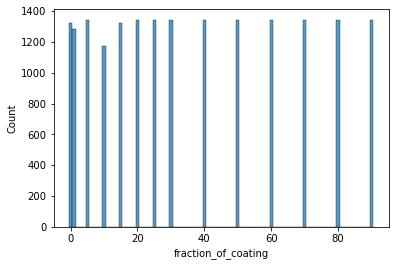

In [17]:
sns.histplot(df['fraction_of_coating'], discrete=True)

In [18]:
df['fraction_of_coating'].unique()

array([ 0,  1,  5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90],
      dtype=int64)

<AxesSubplot:xlabel='primary_particle_size', ylabel='Count'>

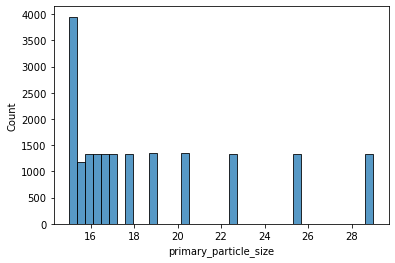

In [20]:
sns.histplot(df['primary_particle_size'])

In [21]:
df['primary_particle_size'].unique()

array([15. , 15.1, 15.3, 15.5, 15.8, 16.2, 16.5, 16.9, 17.8, 18.9, 20.4,
       22.4, 25.6, 29. ])

<AxesSubplot:xlabel='number_of_primary_particles', ylabel='Count'>

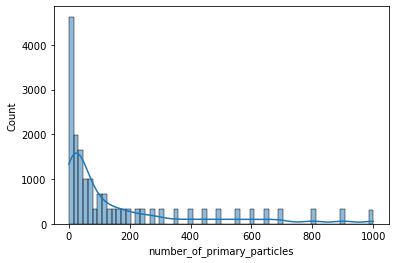

In [22]:
sns.histplot(df['number_of_primary_particles'], kde=True)

In [30]:
num_pp=df['number_of_primary_particles'].unique()
for i in range(0,len(num_pp)):
    num_pp[i]=float(num_pp[i])
    print(num_pp[i])
    


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
12.0
14.0
16.0
18.0
20.0
23.0
26.0
29.0
31.0
34.0
36.0
39.0
42.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
85.0
95.0
105.0
115.0
125.0
140.0
155.0
170.0
185.0
200.0
225.0
250.0
275.0
300.0
350.0
400.0
450.0
500.0
550.0
600.0
650.0
700.0
800.0
900.0
1000.0
0.5


<AxesSubplot:xlabel='vol_equi_radius_inner', ylabel='Count'>

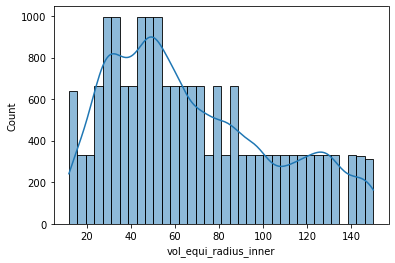

In [31]:
sns.histplot(df['vol_equi_radius_inner'], kde=True)

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

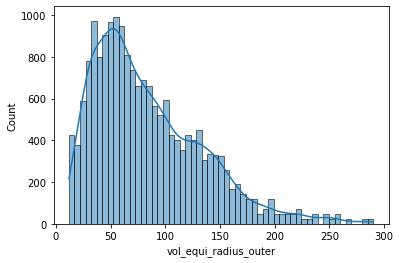

In [32]:
sns.histplot(df['vol_equi_radius_outer'], kde=True)

<AxesSubplot:xlabel='equi_mobility_dia', ylabel='Count'>

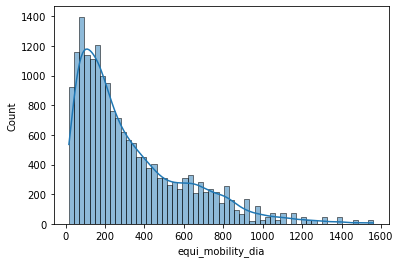

In [33]:
sns.histplot(df['equi_mobility_dia'], kde=True)

In [34]:
df['mie_epsilon'].unique()

array([2], dtype=int64)

Only 1 value -> 2

In [35]:
df['length_scale_factor'].unique()

array([0.09519978, 0.11855067, 0.13454358])

length_scale_factor = 2*pi/wavelength. Dependednt on wavelength feature

<AxesSubplot:xlabel='m_real_bc', ylabel='Count'>

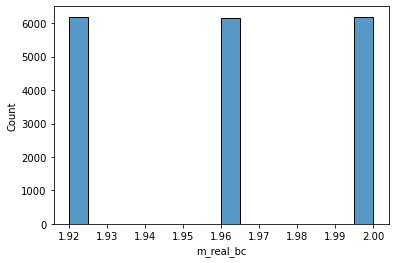

In [36]:
sns.histplot(df['m_real_bc'])

In [37]:
df['m_real_bc'].unique()

array([2.  , 1.96, 1.92])

m_real_bc has only 3 observations as above. Can be considered categorical

<AxesSubplot:xlabel='m_im_bc', ylabel='Count'>

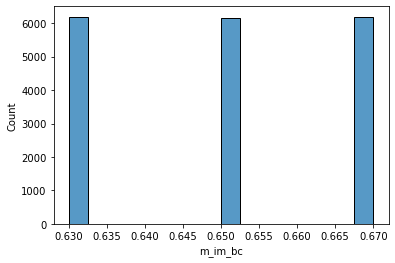

In [38]:
sns.histplot(df['m_im_bc'])

In [39]:
df['m_im_bc'].unique()

array([0.63, 0.65, 0.67])

m_im_bc has only 3 observations as above. Can be considered categorical

<AxesSubplot:xlabel='m_real_organics', ylabel='Count'>

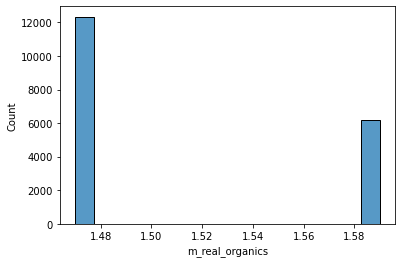

In [40]:
sns.histplot(df['m_real_organics'])

In [41]:
df['m_real_organics'].unique()

array([1.47, 1.59])

m_real_organics has only 2 observations as above. Can be considered categorical

<AxesSubplot:xlabel='m_im_organics', ylabel='Count'>

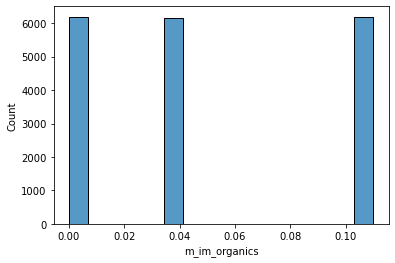

In [42]:
sns.histplot(df['m_im_organics'])

In [43]:
df['m_im_organics'].unique()

array([0.  , 0.04, 0.11])

m_im_organics has only 3 observations as above. Can be considered categorical

<AxesSubplot:xlabel='volume_total', ylabel='Count'>

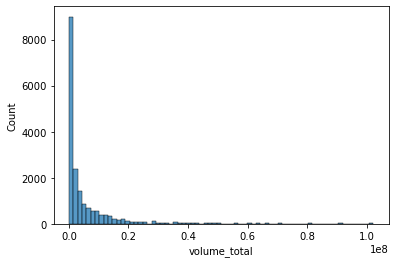

In [44]:
sns.histplot(df['volume_total'], bins= 70)

<AxesSubplot:xlabel='volume_bc', ylabel='Count'>

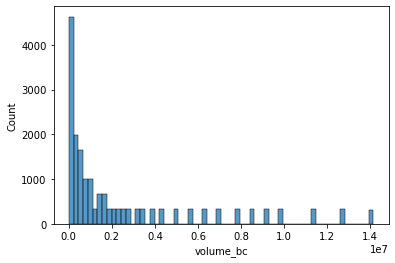

In [45]:
sns.histplot(df['volume_bc'])

<AxesSubplot:xlabel='volume_organics', ylabel='Count'>

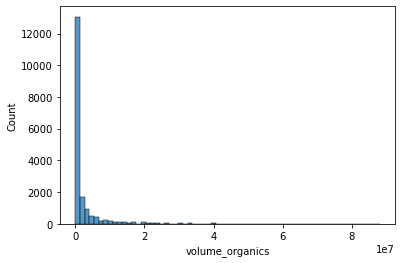

In [46]:
sns.histplot(df['volume_organics'], bins=65)

Density=Mass/Volume

In [47]:
df['density_bc'].unique()

array([1.5])

In [48]:
df['density_organics'].unique()

array([1.1])

<AxesSubplot:xlabel='mass_total', ylabel='Count'>

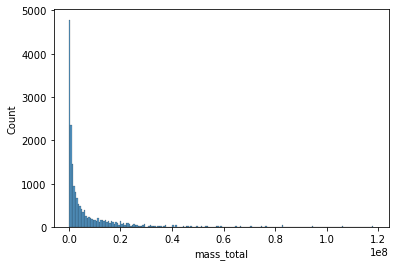

In [49]:
sns.histplot(df['mass_total'])

<AxesSubplot:xlabel='mass_bc', ylabel='Count'>

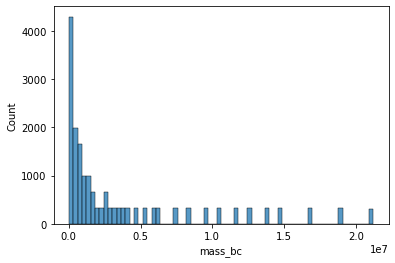

In [50]:
sns.histplot(df['mass_bc'], bins=70)

<AxesSubplot:xlabel='mass_organics', ylabel='Count'>

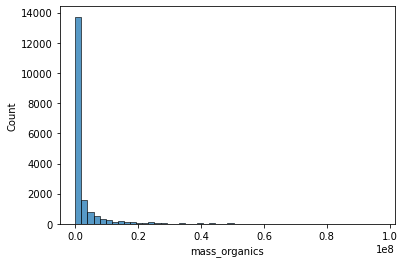

In [51]:
sns.histplot(df['mass_organics'], bins=50)

<AxesSubplot:xlabel='mr_total/bc', ylabel='Count'>

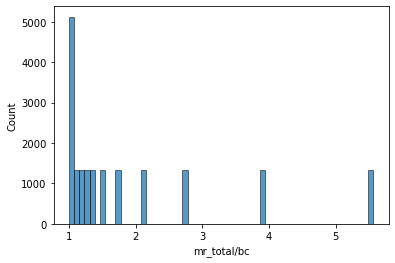

In [52]:
sns.histplot(df['mr_total/bc'])

In [53]:
df['mr_total/bc'].unique()

array([1.        , 1.01476466, 1.04488587, 1.07580494, 1.12370236,
       1.19045547, 1.24273333, 1.3154548 , 1.49209426, 1.73360907,
       2.1113344 , 2.1113344 , 2.70881312, 3.91208644, 5.56600494])

<AxesSubplot:xlabel='mr_nonBC/BC', ylabel='Count'>

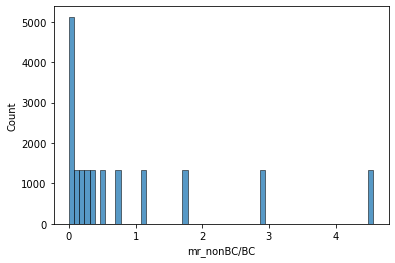

In [54]:
sns.histplot(df['mr_nonBC/BC'])

In [55]:
df['mr_nonBC/BC'].unique()

array([0.        , 0.01476466, 0.01476466, 0.01476466, 0.01476466,
       0.01476466, 0.01476466, 0.01476466, 0.01476466, 0.01476466,
       0.04488587, 0.04488587, 0.04488587, 0.04488587, 0.04488587,
       0.04488587, 0.04488587, 0.04488587, 0.04488587, 0.07580494,
       0.07580494, 0.07580494, 0.07580494, 0.07580494, 0.07580494,
       0.07580494, 0.07580494, 0.07580494, 0.12370236, 0.12370236,
       0.19045547, 0.19045547, 0.24273333, 0.3154548 , 0.3154548 ,
       0.49209426, 0.49209426, 0.73360907, 0.73360907, 0.73360907,
       1.1113344 , 1.1113344 , 1.70881312, 2.91208644, 4.56600494])

In [56]:
#Optical properties

<AxesSubplot:xlabel='q_ext', ylabel='Count'>

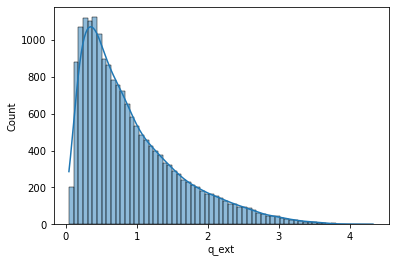

In [57]:
sns.histplot(df['q_ext'], kde=True)

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

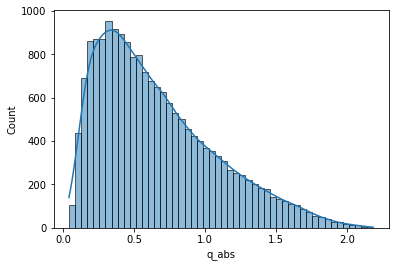

In [58]:
sns.histplot(df['q_abs'], kde=True)

<AxesSubplot:xlabel='q_sca', ylabel='Count'>

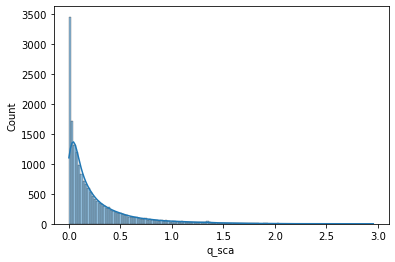

In [59]:
sns.histplot(df['q_sca'], kde=True)

<AxesSubplot:xlabel='g', ylabel='Count'>

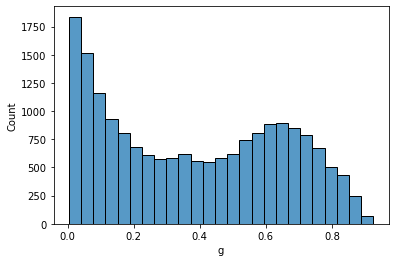

In [60]:
sns.histplot(df['g'])

<AxesSubplot:xlabel='c_geo', ylabel='Count'>

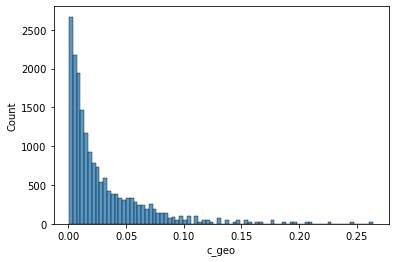

In [61]:
sns.histplot(df['c_geo'], bins=80)

<AxesSubplot:xlabel='c_ext', ylabel='Count'>

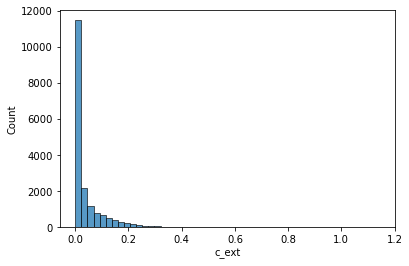

In [62]:
sns.histplot(df['c_ext'], bins=50)

<AxesSubplot:xlabel='c_abs', ylabel='Count'>

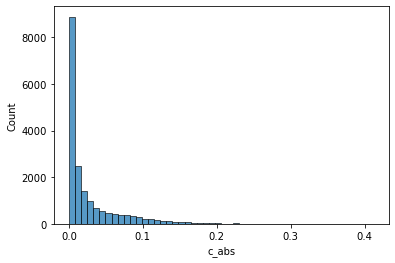

In [63]:
sns.histplot(df['c_abs'], bins=50)

<AxesSubplot:xlabel='ssa', ylabel='Count'>

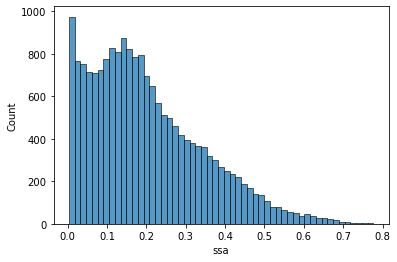

In [64]:
sns.histplot(df['ssa'])

<AxesSubplot:xlabel='mac_total', ylabel='Count'>

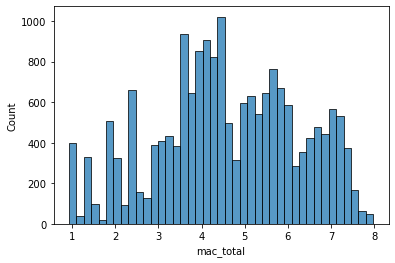

In [65]:
sns.histplot(df['mac_total'])

<AxesSubplot:xlabel='mac_bc', ylabel='Count'>

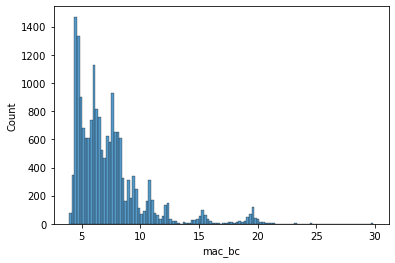

In [66]:
sns.histplot(df['mac_bc'])

TypeError: 'value' must be an instance of str or bytes, not a float

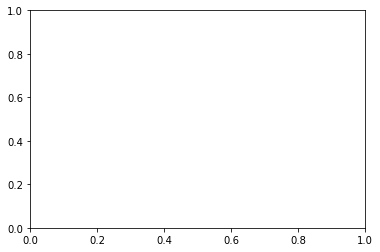

In [57]:
sns.histplot(df['mac_organics'], bins=40)

Checking correlation between features

In [ ]:
sns.pairplot(df)

TypeError: 'value' must be an instance of str or bytes, not a float

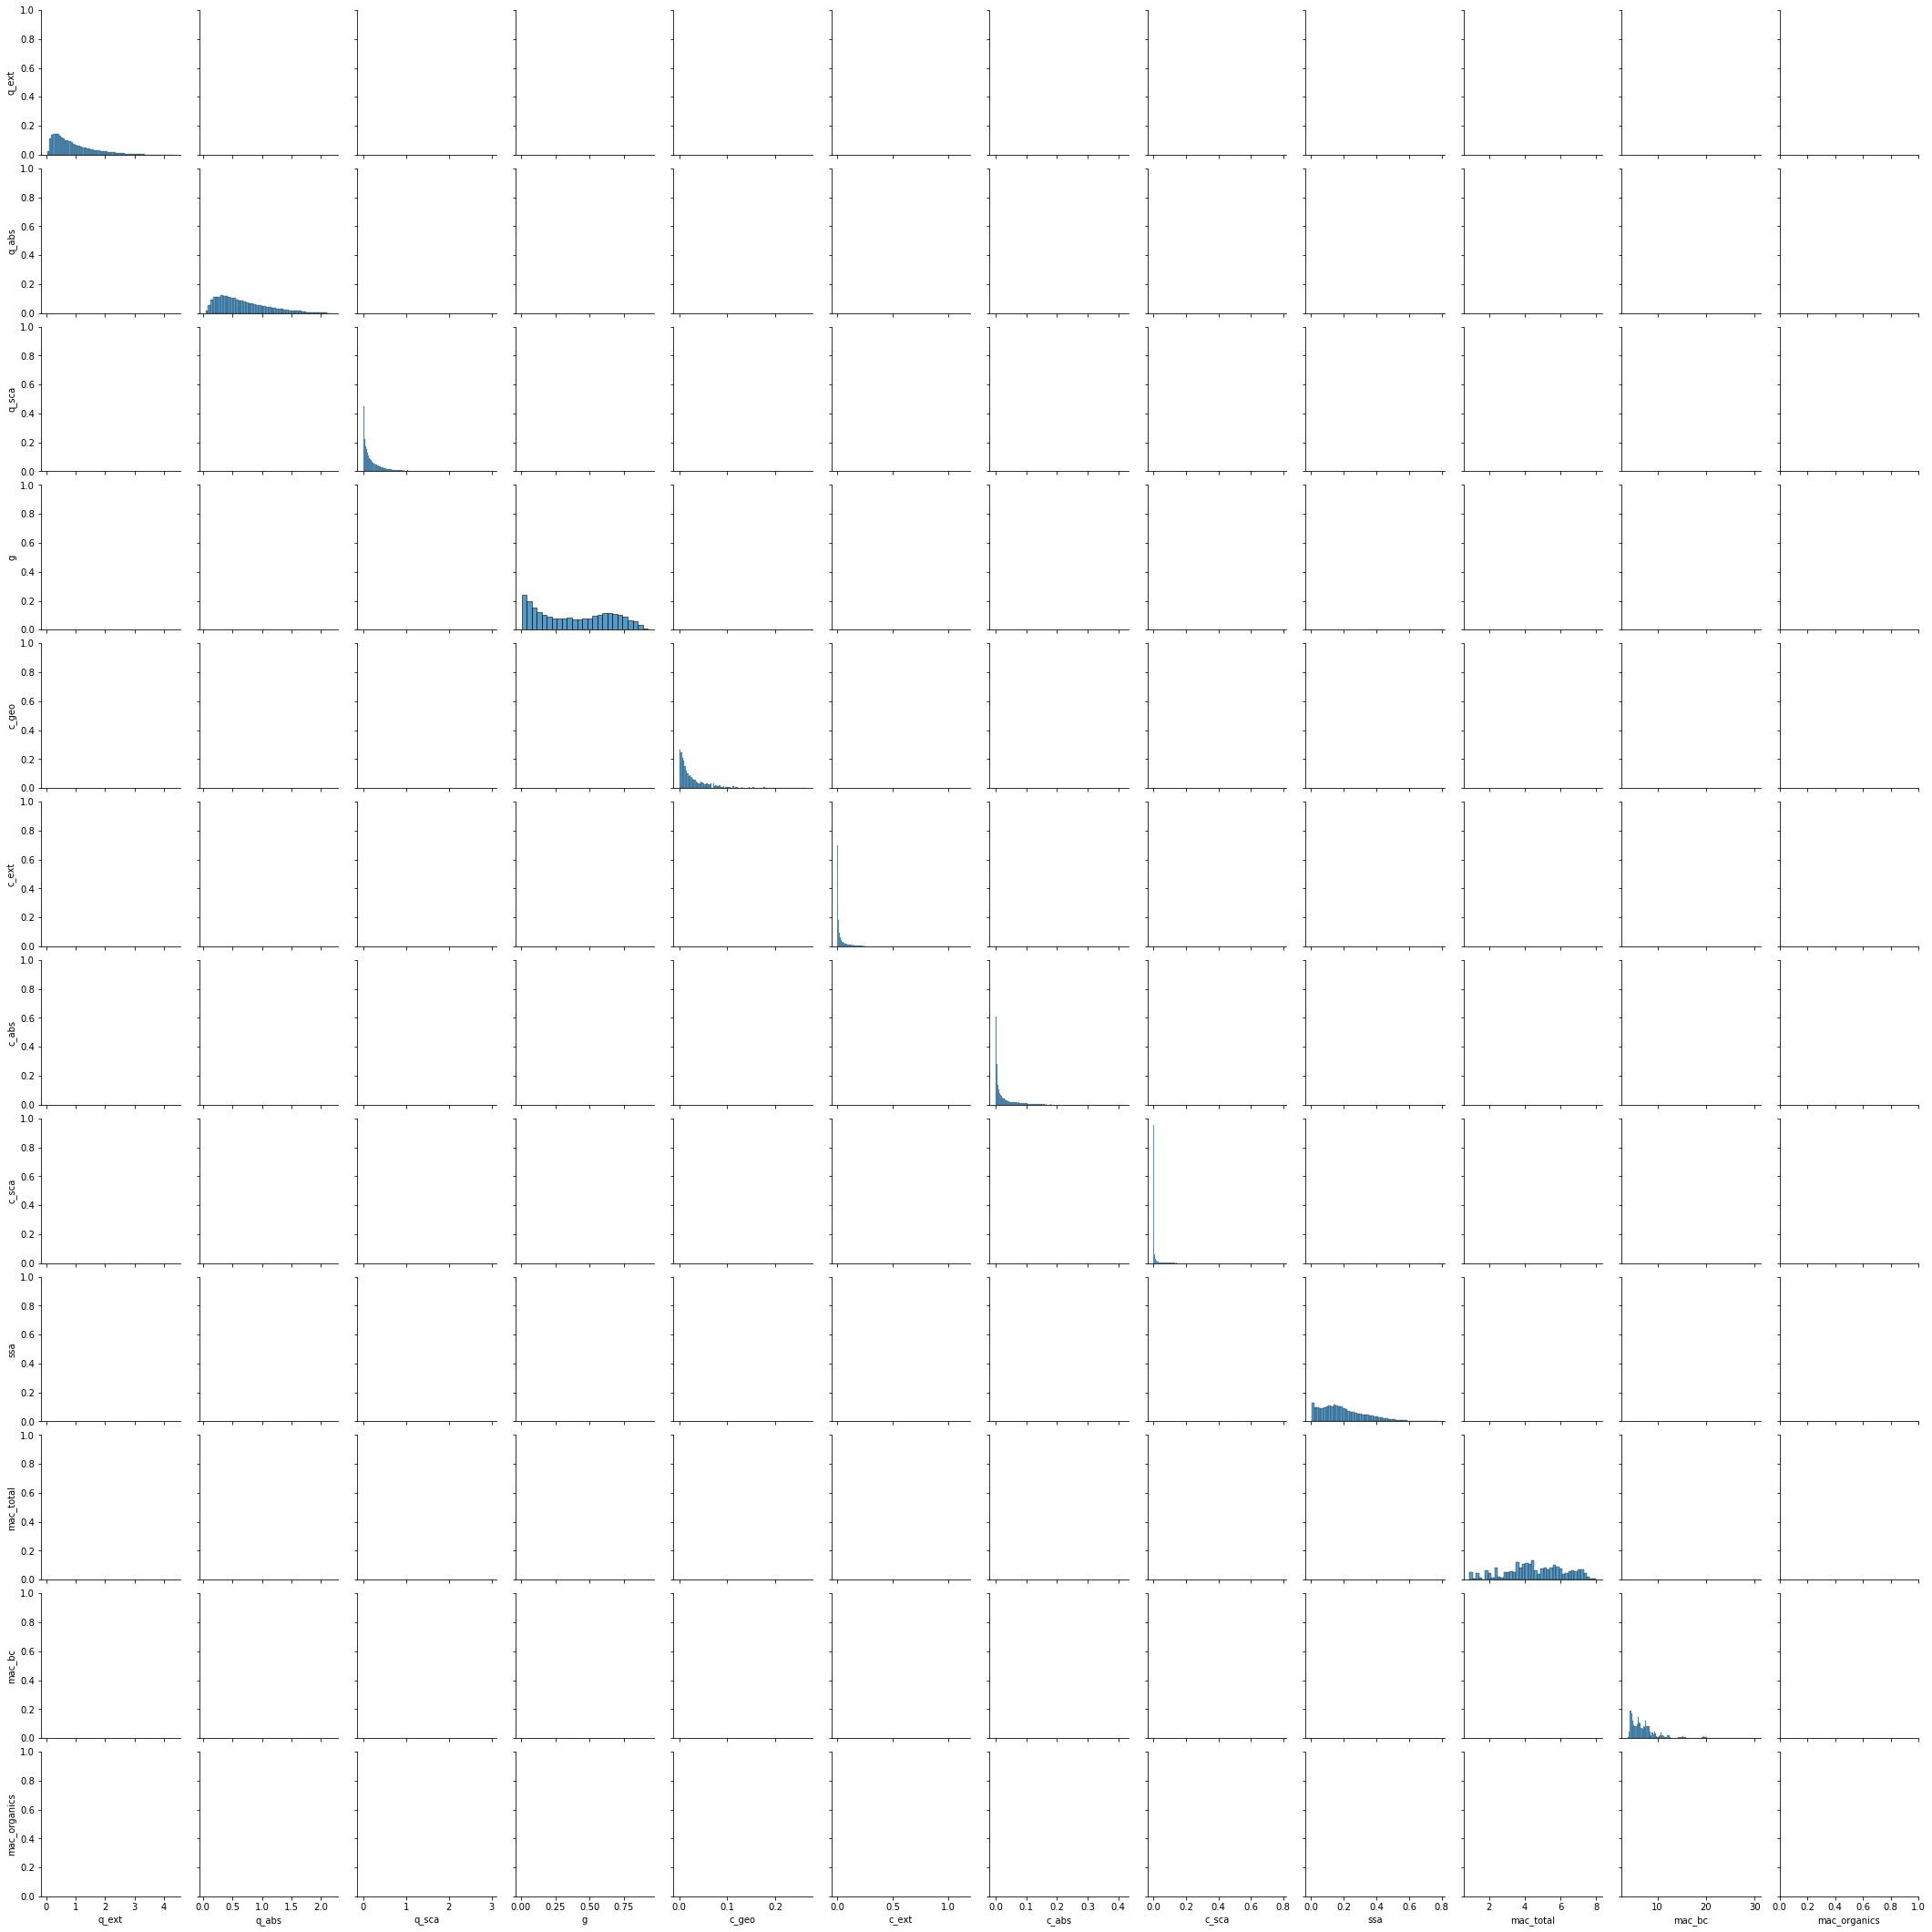

In [67]:
sns.pairplot(df, vars=['q_ext', 'q_abs', 'q_sca', 'g', 'c_geo', 'c_ext', 'c_abs','c_sca', 'ssa', 'mac_total', 'mac_bc','mac_organics'], palette="deep")

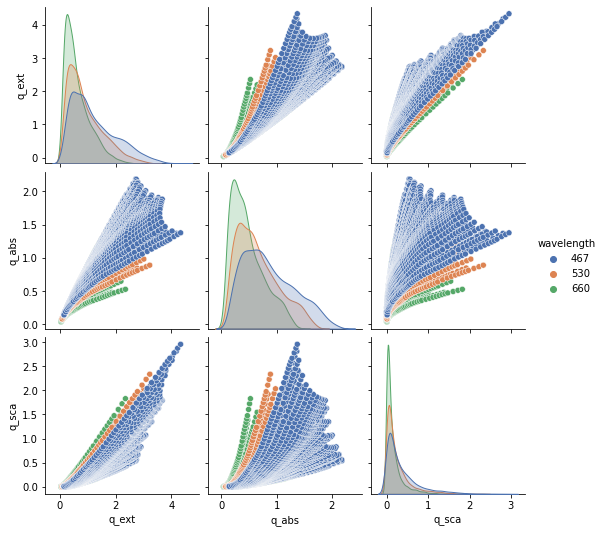

In [68]:
sns.pairplot(df, vars=['q_ext', 'q_abs', 'q_sca'], hue="wavelength", palette="deep")

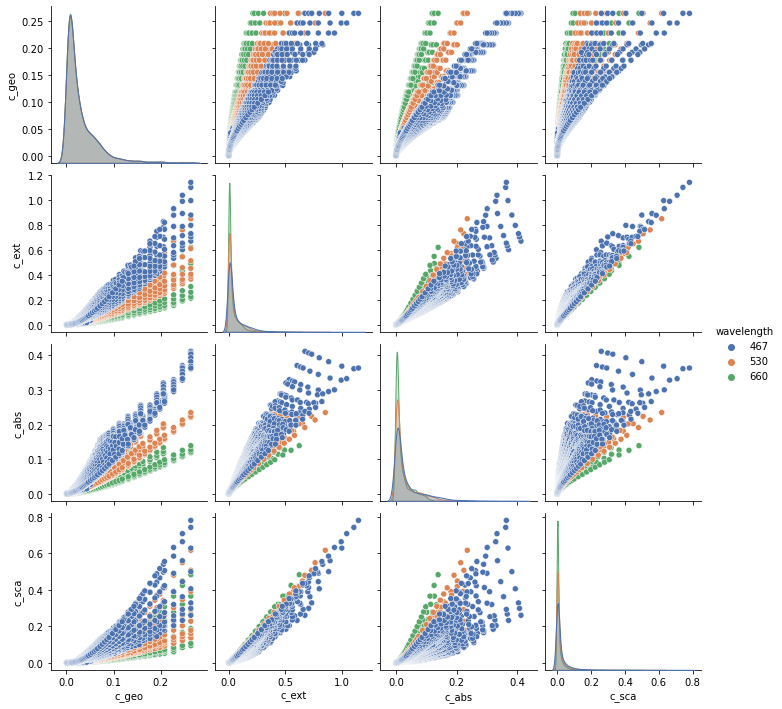

In [69]:
sns.pairplot(df, vars=[ 'c_geo', 'c_ext', 'c_abs','c_sca'], hue="wavelength", palette="deep")

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

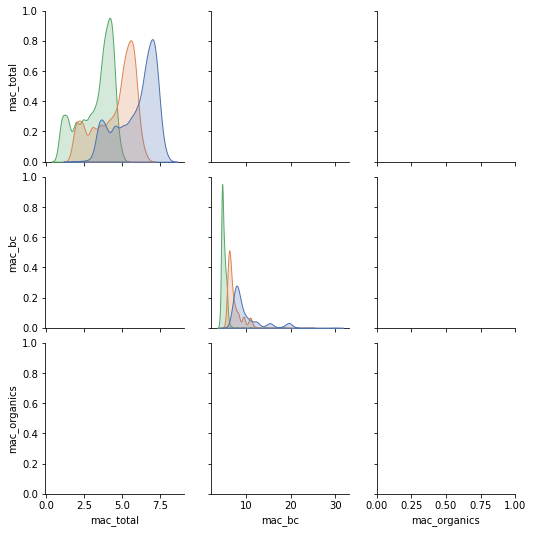

In [70]:
sns.pairplot(df, vars=[ 'mac_total', 'mac_bc','mac_organics'], hue="wavelength", palette="deep")

<AxesSubplot:xlabel='fractal_dimension', ylabel='c_abs'>

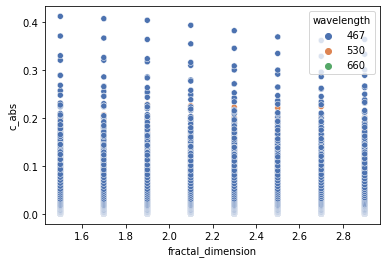

In [71]:
sns.scatterplot(data=df, x="fractal_dimension", y="c_abs", hue="wavelength", palette="deep")

<AxesSubplot:xlabel='fractal_dimension', ylabel='c_sca'>

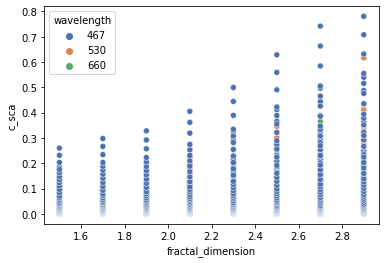

In [72]:
sns.scatterplot(data=df, x="fractal_dimension", y="c_sca", hue="wavelength", palette="deep")

<AxesSubplot:xlabel='fractal_dimension', ylabel='g'>

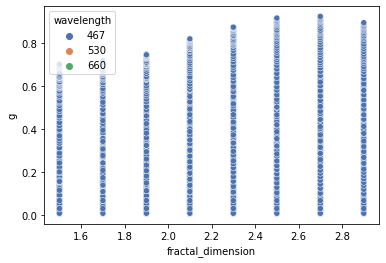

In [73]:
sns.scatterplot(data=df, x="fractal_dimension", y="g", hue="wavelength", palette="deep")

<AxesSubplot:xlabel='fractal_dimension', ylabel='ssa'>

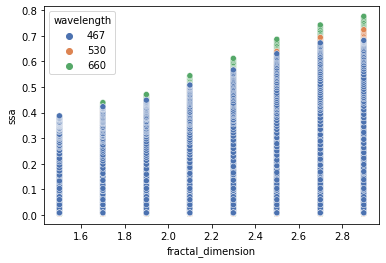

In [74]:
sns.scatterplot(data=df, x="fractal_dimension", y="ssa", hue="wavelength", palette="deep")

<AxesSubplot:xlabel='equi_mobility_dia', ylabel='c_abs'>

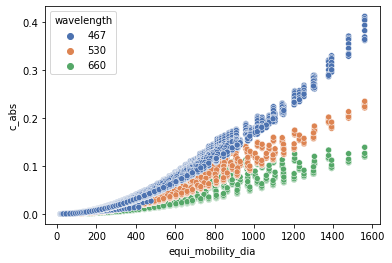

In [75]:
sns.scatterplot(data=df, x="equi_mobility_dia", y="c_abs", hue="wavelength", palette="deep")

In [79]:
#train set leaving fractal dimesnion =2.1, 2.3 out

In [83]:
train_set=df[(df['fractal_dimension']<2.1) | (df['fractal_dimension']>2.3)]
test_set=df[(df['fractal_dimension']==2.1) | (df['fractal_dimension']==2.3)]
test_set.shape

(4642, 36)

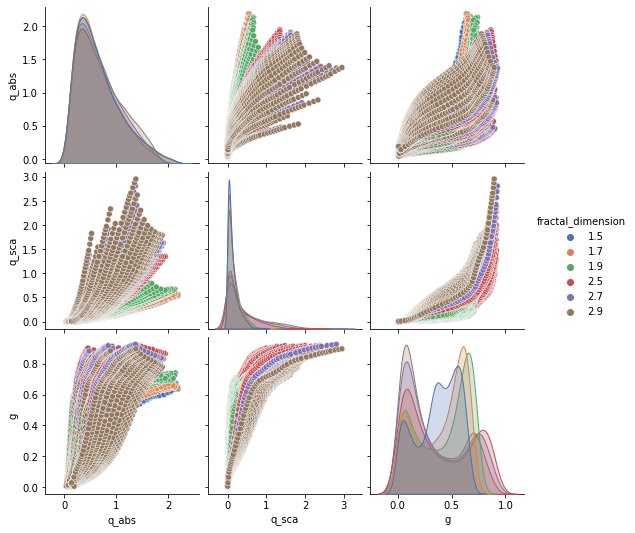

In [84]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep")

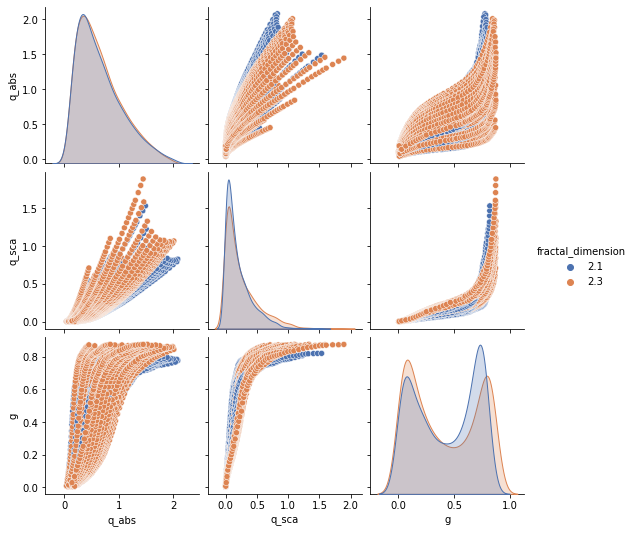

In [85]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep")